In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pygad
import requests
import warnings

from scipy.optimize import minimize, rosen, rosen_der
from matplotlib.cm import inferno as colormap
from matplotlib.colors import LogNorm

from matplotlib.animation import FuncAnimation
import random
from mpl_toolkits.mplot3d import Axes3D, proj3d

from matplotlib import animation, rc
from IPython.display import HTML

warnings.filterwarnings('ignore')

<center>

# Parte 1: optimización numérica}
</center>

# FUNCIÓN ROSENBROCK

Definida para _n_ dimensiones como:
$$
f(x_1,\ldots,x_N) =
\sum_{i=1}^{N-1} {[100(x_{i+1} + x_i²)² + (1 -  x_i²)²]}
$$

## Dos dimensiones

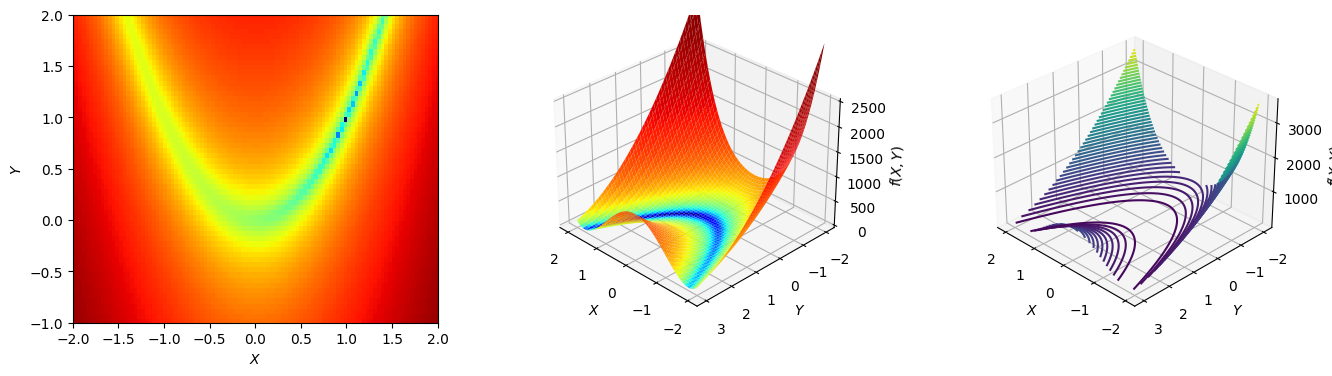

In [ ]:
x1 = np.linspace(-2, 2, 100)
x2 = np.linspace(-2, 3, 100)
X1, X2 = np.meshgrid(x1, x2)
Z = rosen([X1,X2])

fig = plt.figure(figsize=(16, 4))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132, projection="3d")
ax3 = fig.add_subplot(133, projection="3d")

ax1.set_xlim([-2, 2])
ax1.set_ylim([-1, 2])
ax1.set_xlabel("$X$")
ax1.set_ylabel("$Y$")

ax2.set_xlabel('$X$')
ax2.set_ylabel('$Y$')
ax2.set_zlabel('$f(X,Y)$')
ax2.set_zlim([0, 2500])



ax3.set_xlabel('$X$')
ax3.set_ylabel('$Y$')
ax3.set_zlabel('$f(X,Y)$')


ax1.pcolormesh(X1, X2, Z, cmap='jet',norm=LogNorm())
#ax1.scatter(1, 1, color="k")
#ax1.annotate('Global Min', xy=(1, 1), xytext=(-0.5, 1.25),arrowprops=dict(facecolor='black', shrink=0.05))

# Surface plot
ax2.plot_surface(X1, X2, Z, norm = LogNorm(), cmap=matplotlib.cm.jet, linewidth=0)
ax2.view_init(elev=30, azim=135)  # Por ejemplo, elevación de 30 grados y azimut de 45 grados

#ax3.contour(X1, X2, Z, cmap=matplotlib.cm.jet, linewidth=0)
ax3.contour(X1, X2, Z,50)
ax3.view_init(elev=30, azim=135)  # Por ejemplo, elevación de 30 grados y azimut de 45 grados




# plt.savefig('rosenbrock.jpg')
plt.show()

### Optimización

Vamos a proceder a optimizar la función dadas unas condiciones iniciales aleatorias

In [ ]:
lsize = 2   #tamaño de la lista
n1 = 0      #limite izquierdo
n2 = 2      #limite derecho
ci = [round(random.uniform(n1, n2),2) for _ in range(lsize)]  #condiciones iniciales
res = minimize(rosen, ci, method='Nelder-Mead', tol=1e-6, options = {'disp':True})
res.x

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 77
         Function evaluations: 144


array([1.        , 0.99999998])

In [ ]:
res = minimize(rosen, ci, method='BFGS', jac=rosen_der,
               options={'gtol': 1e-6, 'disp': True})
res.x

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 18
         Function evaluations: 21
         Gradient evaluations: 21


array([1., 1.])

Se observa que el algoritmo BFGS (Broyden-Fletcher-Goldfarb-Shanno) converge más rápidamente. Vamos a proceder con este haciendo uso del callback.

In [ ]:
# Función para almacenar los resultados de cada iteración
def callback(xk):
    global iterations
    global sol

    #print(f"Iteration {iterations}: x = {xk}")
    sol.append(xk)
    iterations += 1


def rosen_opt(dim):
  global ci,iterations,sol,X1,X2,X3,Z

  # Punto inicial y contador de iteraciones
  n1 = -2      #limite izquierdo
  n2 = 2      #limite derecho
  iterations = 0
  sol = []

  if dim == 2:
    ci = [random.uniform(n1, n2) for _ in range(dim)]  #condiciones iniciales
    x1 = np.linspace(-2, 2, 100)
    x2 = np.linspace(-2, 3, 100)
    X1, X2 = np.meshgrid(x1, x2)
    Z = rosen([X1,X2])


  elif dim ==3:
    li = -2
    ls = 2
    num = random.uniform(li,ls)

    ci = [random.uniform(n1, n2) for _ in range(dim-1)]  #condiciones iniciales
    ci.append(num)
    print(f"X3 = {round(num,2)}")
    x1 = np.linspace(-2, 2, 100)
    x2 = np.linspace(-2, 2, 100)
    x3 = [num] * x2.shape[0]
    X1, X2, X3 = np.meshgrid(x1, x2, x3)
    Z = rosen([X1,X2,X3])



  print(f"Condiciones iniciales: {[round(num, 2) for num in ci]}\n\n")

  # Optimización con callback
  res = minimize(rosen, ci, method='BFGS', jac=rosen_der, options={'gtol': 1e-6, 'disp': False}, callback=callback)
  # Resultado final

  print("\nFinal result:")
  print(f"Resultado: {res.x}, Iterations: {iterations}")
  return res


Condiciones iniciales: [1.85, 1.62]



Final result:
Resultado: [1. 1.], Iterations: 32


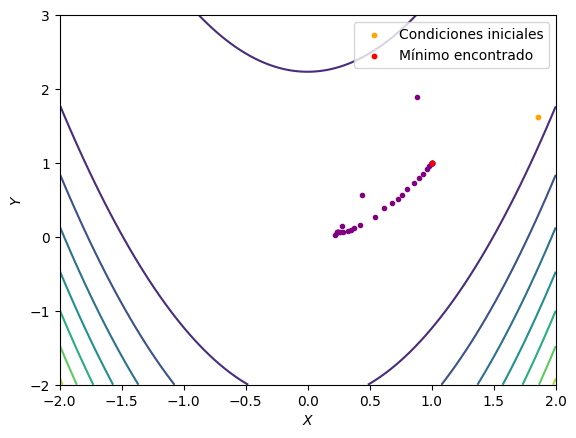

In [ ]:
result = rosen_opt(2)


fig , ax = plt.subplots()
ax.contour(X1,X2,Z)

for k in range(iterations):
  plt.plot(sol[k][0],sol[k][1],'.',color = 'purple',zorder = 1)

ax.set_xlabel('$X$')
ax.set_ylabel('$Y$')
#ax.annotate('Global Min', xy=(result.x[0], result.x[1]), xytext=(-0.5, 1.25),arrowprops=dict(facecolor='black', shrink=0.05))
ax.scatter(ci[0], ci[1], color='orange', s=10, label='Condiciones iniciales', zorder = 2)
ax.scatter(result.x[0], result.x[1], color='red', s=10, label='Mínimo encontrado', zorder = 2)

plt.legend()
plt.show()


#### Animación

In [ ]:
sol = np.asarray(sol)

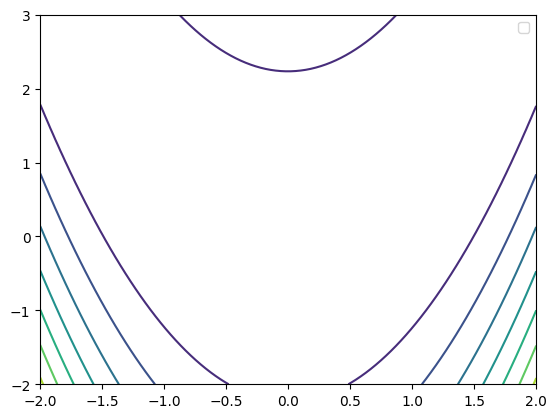

In [ ]:
# Configurar la figura y el gráfico de contorno
fig, ax = plt.subplots()
contour = ax.contour(X1, X2, Z)
scatter = ax.scatter([], [])
plt.legend()

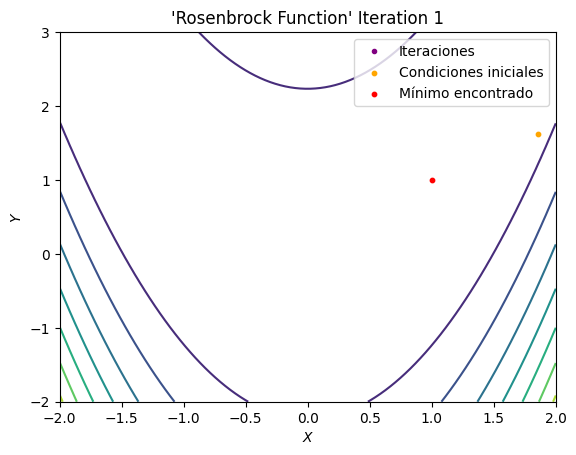

In [ ]:
# Función para actualizar el gráfico
def update_plot(k):
    ax.clear()
    ax.contour(X1, X2, Z)
    ax.plot(sol[:k, 0], sol[:k, 1], '.', color='purple', zorder=1, label='Iteraciones')
    ax.set_xlabel('$X$')
    ax.set_ylabel('$Y$')
    ax.set_title("'Rosenbrock Function' Iteration " + str(k+1))
    ax.scatter(ci[0], ci[1], color='orange', s=10, label='Condiciones iniciales', zorder=2)
    ax.scatter(sol[-1, 0], sol[-1, 1], color='red', s=10, label='Mínimo encontrado', zorder=2)
    ax.legend()

# Configuración inicial del gráfico
fig, ax = plt.subplots()
ani = animation.FuncAnimation(fig, update_plot,frames=len(sol)+1, interval=500, repeat=False)
ani.save('Rosenbrock_grad_descent.mp4', writer='ffmpeg')


## Tres dimensiones

### Optimización

Podemos usar nuestra optimización para 3 dimensiones

In [ ]:
result = rosen_opt(3)

X3 = -1.34
Condiciones iniciales: [0.61, -1.52, -1.34]



Final result:
Resultado: [1.         0.99999999 0.99999999], Iterations: 40


Para poder observar graficamente debemos fijar la tercera entrada y graficar. Se toma la entrada $X_3$ como una constante aleatoria entre un rango.

X3 = 0.94
Condiciones iniciales: [0.12, 0.29, 0.94]



Final result:
Resultado: [1.         0.99999999 0.99999998], Iterations: 30


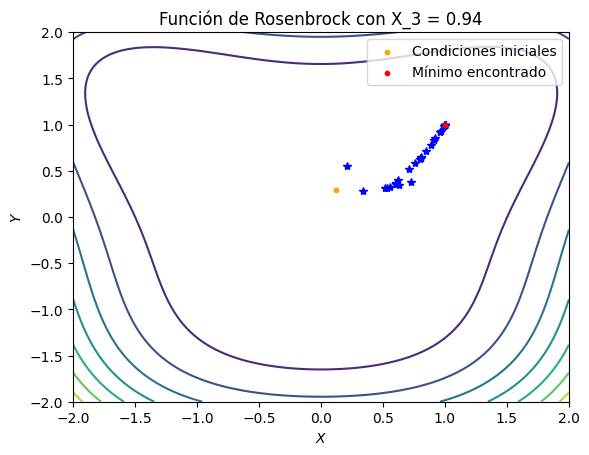

In [ ]:
result = rosen_opt(3)


fig , ax = plt.subplots()
ax.contour(X1[:,:,0], X2[:,:,0], Z[:,:,0])

for k in range(iterations):
  plt.plot(sol[k][0],sol[k][1],'*b')

ax.set_xlabel('$X$')
ax.set_ylabel('$Y$')
ax.set_title(f'Función de Rosenbrock con X_3 = {round(ci[2],2)}')
# ax.annotate('Global Min', xy=(result.x[0], result.x[1]), xytext=(-0.5, 1.25),arrowprops=dict(facecolor='black', shrink=0.05))
ax.scatter(ci[0], ci[1], color='orange', s=10, label='Condiciones iniciales', zorder = 2)
ax.scatter(result.x[0], result.x[1], color='red', s=10, label='Mínimo encontrado', zorder = 2)



plt.legend()
plt.show()

#### Animación

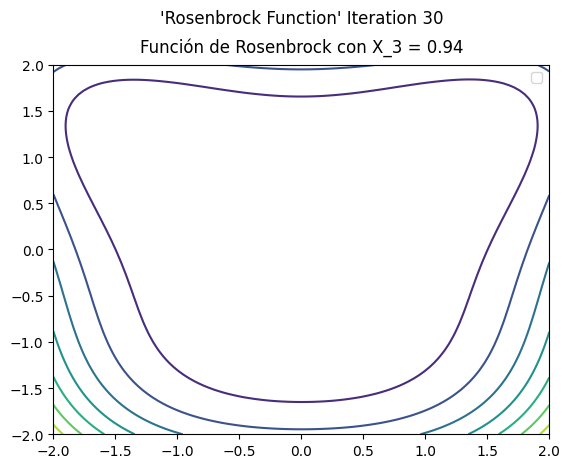

In [ ]:
# Configurar la figura y el gráfico de contorno
fig, ax = plt.subplots()
ax.contour(X1[:,:,0], X2[:,:,0], Z[:,:,0])
scatter = ax.scatter([], [])
ax.set_title("'Rosenbrock Function' Iteration " + str(k+1),pad=30)
ax.text(0.5, 1.05, f'Función de Rosenbrock con X_3 = {round(ci[2],2)}', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=12)

# ax.set_subtitle(f'Función de Rosenbrock con X_3 = {round(ci[2],2)}')
plt.legend()

In [ ]:
sol = np.asarray(sol)

array([[ 0.20859916,  0.5490846 , -0.03302526],
       [ 0.34107133,  0.27784371, -0.29732503],
       [ 0.53480147,  0.3151878 , -0.28070138],
       [ 0.55579873,  0.32353717, -0.21375367],
       [ 0.51930804,  0.3146201 , -0.07788101],
       [ 0.72367086,  0.37987564,  0.16219967],
       [ 0.6277569 ,  0.35047645,  0.16490995],
       [ 0.60396482,  0.35195769,  0.10876153],
       [ 0.60353524,  0.35735825,  0.12557744],
       [ 0.60863807,  0.36869174,  0.13894349],
       [ 0.6255388 ,  0.3947791 ,  0.16272345],
       [ 0.71321347,  0.51656549,  0.2666481 ],
       [ 0.75897045,  0.57818335,  0.32114634],
       [ 0.80390212,  0.63604028,  0.38171036],
       [ 0.79722605,  0.62618736,  0.37988733],
       [ 0.80984605,  0.64718853,  0.41551209],
       [ 0.8476166 ,  0.71213702,  0.50655965],
       [ 0.88847167,  0.78253649,  0.60315137],
       [ 0.91339516,  0.83656883,  0.68793686],
       [ 0.91956402,  0.85023512,  0.7192862 ],
       [ 0.95992215,  0.91888588,  0.837

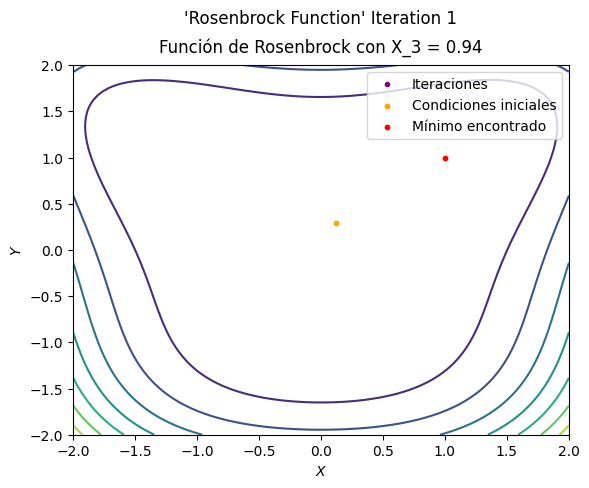

In [ ]:
# Función para actualizar el gráfico
def update_plot(k):
  ax.clear()
  ax.contour(X1[:,:,0], X2[:,:,0], Z[:,:,0])
  ax.plot(sol[:k, 0], sol[:k, 1], '.', color='purple', zorder=1, label='Iteraciones')
  ax.set_xlabel('$X$')
  ax.set_ylabel('$Y$')
  ax.set_title("'Rosenbrock Function' Iteration " + str(k+1),pad=30)
  ax.text(0.5, 1.05, f'Función de Rosenbrock con X_3 = {round(ci[2],2)}', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=12)
  ax.scatter(ci[0], ci[1], color='orange', s=10, label='Condiciones iniciales', zorder=2)
  ax.scatter(sol[-1, 0], sol[-1, 1], color='red', s=10, label='Mínimo encontrado', zorder=2)
  ax.legend()

# Configuración inicial del gráfico
fig, ax = plt.subplots()
ani = animation.FuncAnimation(fig, update_plot,frames=len(sol)+1, interval=500, repeat=False)
ani.save('Rosenbrock_3d_grad_descent.mp4', writer='ffmpeg')


****
# FUNCIÓN DE LAS SEIS JOROBAS




La función *Six hump camel* se define para __2__ dimensiones como:

$$
f(x_1, x_2) = (4 - 2.1x_1^2 + \frac{x_1^4}{3})x_1^2 + x_1 x_2 + (-4 + 4x_2^2)x_2^2
$$

In [ ]:
def six_hump(x):
  x = np.asarray(x)
  return (4 - 2.1 * x[0]**2 + (x[0]**4) / 3) * x[0]**2 + x[0] * x[1] + (-4 + 4 * x[1]**2) * x[1]**2

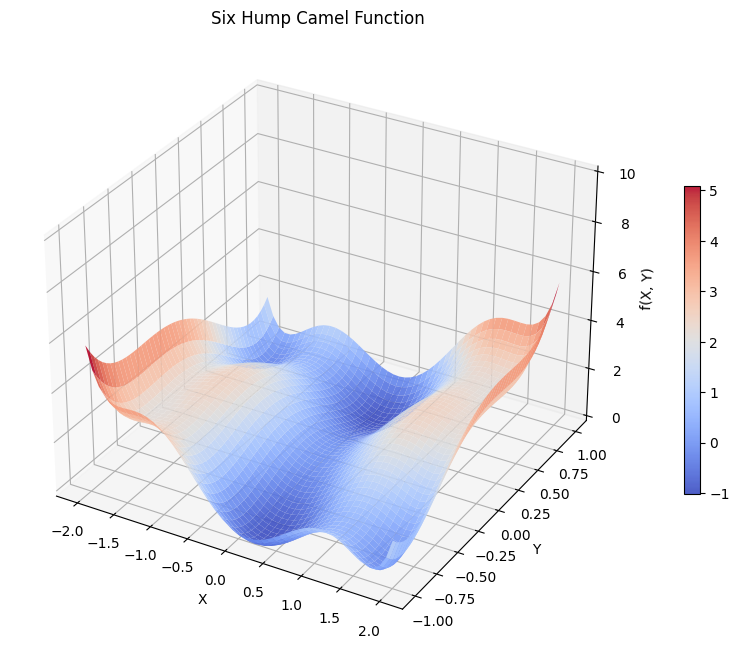

In [ ]:
x1 = np.linspace(-2,2)
x2 = np.linspace(-1,1)
X1,X2 = np.meshgrid(x1, x2)
F = six_hump([X1,X2])

fig = plt.figure(figsize=[15,8])
ax = plt.axes(projection='3d')


ax.set_xlabel ('X')
ax.set_ylabel ('Y')
ax.set_zlabel ('f(X, Y)')
ax.set_title('Six Hump Camel Function')
ax.set_zlim([0, 10])
ax.zaxis.set_tick_params(pad=5)  # Ajusta la distancia del label del eje z al eje z




#ax.plot_wireframe(X1,X2,F,alpha=1,rcount=15,ccount=15)
surf = ax.plot_surface(X1,X2,F,cmap= 'coolwarm',alpha=0.9)
fig.colorbar(surf, shrink=0.5, aspect=20)

# plt.legend()
plt.show()

## OPTIMIZACIÓN

In [ ]:
def six_hump_opt(dim):
  global ci,iterations,sol,X1,X2,X3,Z

  # Punto inicial y contador de iteraciones
  n1 = -2      #limite izquierdo
  n2 = 2      #limite derecho
  iterations = 0
  sol = []

  if dim == 2:
    ci = [random.uniform(n1, n2) for _ in range(dim)]  #condiciones iniciales
    x1 = np.linspace(-2, 2, 100)
    x2 = np.linspace(-2, 3, 100)
    X1, X2 = np.meshgrid(x1, x2)
    Z = six_hump([X1,X2])


  elif dim ==3:
    li = -2
    ls = 2
    num = random.uniform(li,ls)

    ci = [random.uniform(n1, n2) for _ in range(dim-1)]  #condiciones iniciales
    ci.append(num)
    print(f"X3 = {round(num,2)}")
    x1 = np.linspace(-2, 2, 100)
    x2 = np.linspace(-2, 2, 100)
    x3 = [num] * x2.shape[0]
    X1, X2, X3 = np.meshgrid(x1, x2, x3)
    Z = six_hump([X1,X2,X3])



  print(f"Condiciones iniciales: {[round(num, 2) for num in ci]}\n\n")

  # Optimización con callback
  res = minimize(six_hump, ci, method='BFGS', options={'gtol': 1e-6, 'disp': False}, callback=callback)
  # Resultado final

  print("\nFinal result:")
  print(f"Resultado: {res.x}, Iterations: {iterations}")
  return res


Condiciones iniciales: [0.04, 1.23]



Final result:
Resultado: [-0.08984202  0.7126564 ], Iterations: 8


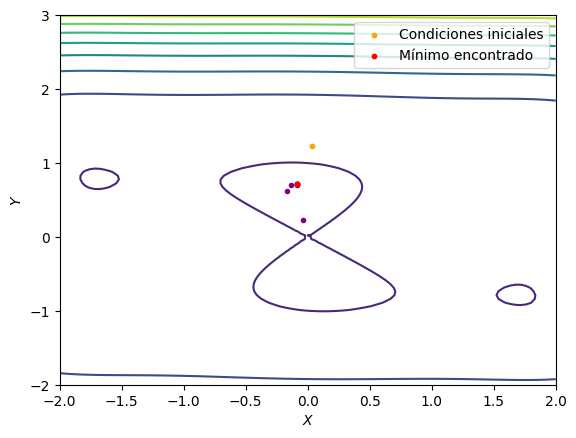

In [ ]:
result = six_hump_opt(2)


fig , ax = plt.subplots()
ax.contour(X1,X2,Z)

for k in range(iterations):
  plt.plot(sol[k][0],sol[k][1],'.',color = 'purple',zorder = 1)

ax.set_xlabel('$X$')
ax.set_ylabel('$Y$')
#ax.annotate('Global Min', xy=(result.x[0], result.x[1]), xytext=(-0.5, 1.25),arrowprops=dict(facecolor='black', shrink=0.05))
ax.scatter(ci[0], ci[1], color='orange', s=10, label='Condiciones iniciales', zorder = 2)
ax.scatter(result.x[0], result.x[1], color='red', s=10, label='Mínimo encontrado', zorder = 2)

plt.legend()
plt.show()

### Animación

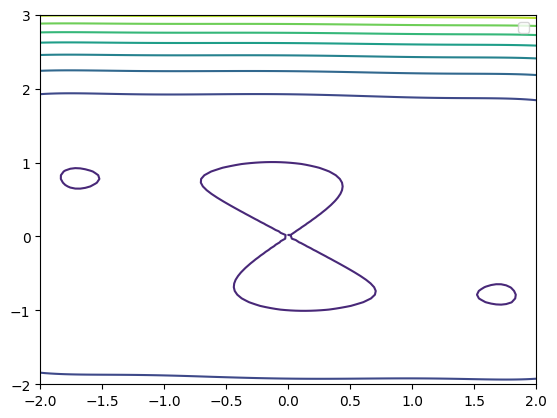

In [ ]:
# Configurar la figura y el gráfico de contorno
fig, ax = plt.subplots()
contour = ax.contour(X1, X2, Z)
scatter = ax.scatter([], [])
plt.legend()

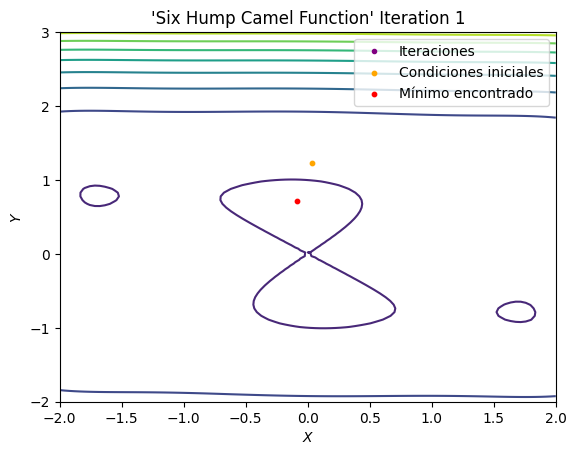

In [ ]:
sol = np.asarray(sol)
# Función para actualizar el gráfico
def update_plot(k):
  ax.clear()
  ax.contour(X1, X2, Z)
  ax.plot(sol[:k, 0], sol[:k, 1], '.', color='purple', zorder=1, label='Iteraciones')
  ax.set_xlabel('$X$')
  ax.set_ylabel('$Y$')
  ax.set_title("'Six Hump Camel Function' Iteration " + str(k+1))
  ax.scatter(ci[0], ci[1], color='orange', s=10, label='Condiciones iniciales', zorder=2)
  ax.scatter(sol[-1, 0], sol[-1, 1], color='red', s=10, label='Mínimo encontrado', zorder=2)
  ax.legend()

# Configuración inicial del gráfico
fig, ax = plt.subplots()
ani = animation.FuncAnimation(fig, update_plot,frames=len(sol)+1, interval=1000, repeat=False)
ani.save('SixHump_grad_descent.mp4', writer='ffmpeg')


# USANDO ALGORITMOS EVOLUTIVOS

___

In [ ]:
def mi_f_fitness(ga_instance,solution,solution_idx):
  y = -rosen(solution)
  #print(solution)
  return(y)

In [ ]:
fitness_function = mi_f_fitness

num_generations = 200
num_parents_mating = 2

sol_per_pop = 20
num_genes = 2

init_range_low = -10.0
init_range_high = 10.0

parent_selection_type = "sss"
keep_parents = 1

crossover_type = "single_point"

mutation_type = "random"
mutation_percent_genes = 10

In [ ]:
ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       init_range_low=init_range_low,
                       init_range_high=init_range_high,
                       gene_space = {'low': -1.0, 'high': 1.0},
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes,
                       save_solutions=True)

/usr/local/lib/python3.10/dist-packages/pygad/pygad.py:748: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
/usr/local/lib/python3.10/dist-packages/pygad/pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause t

In [ ]:
ga_instance.run()

solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Mejor solución : {solution}".format(solution=solution))
print("Valor de la función objetivo = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Posición de la mejor solución = {solution_idx}".format(solution_idx=solution_idx))

Mejor solución : [0.89287802 0.79616466]
Valor de la función objetivo = -0.011588860069117532
Posición de la mejor solución = 0


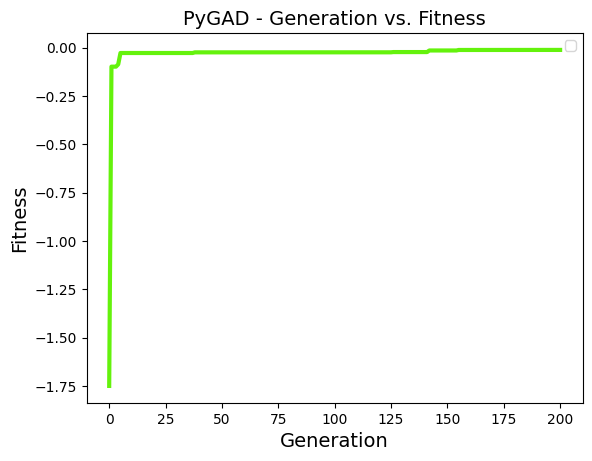

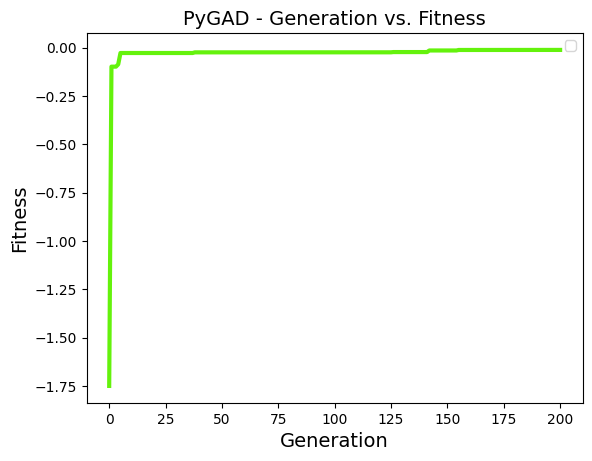

In [ ]:
ga_instance.plot_fitness()

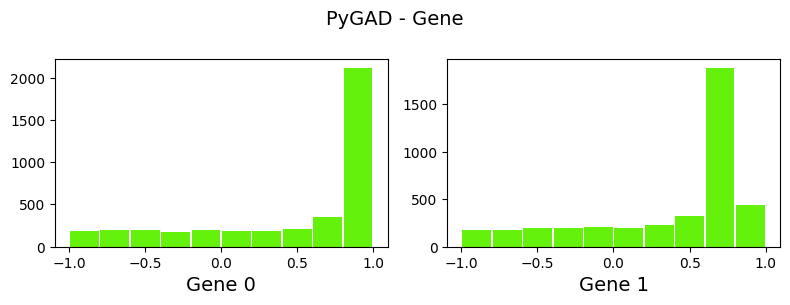

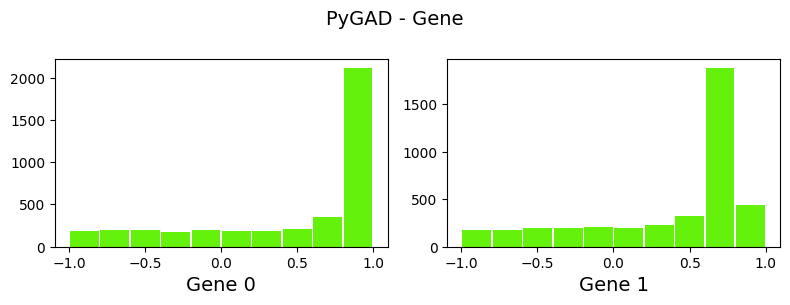

In [ ]:
ga_instance.plot_genes(graph_type='histogram')

In [ ]:
x1 = np.linspace(-2, 2, 100)
x2 = np.linspace(-2, 3, 100)
X1, X2 = np.meshgrid(x1, x2)
Z = rosen([X1,X2])

<center>

# Parte 2: optimización combinatoria
</center>

In [2]:
# Cargar datos
matriz_distancias = pd.read_csv('matriz_distancias.csv')

In [3]:
# Reemplazar NaN por 0
matriz_distancias.replace(np.nan, 0, inplace=True)

In [4]:
# Eliminar las últimas 3 filas
matriz_distancias.drop(matriz_distancias.index[-3:], inplace=True)

In [5]:
# Formatear los datos de la columna 'Distancia (kilómetros)'
matriz_distancias['Distancia (kilómetros)'] = matriz_distancias['Distancia (kilómetros)'].apply(lambda x: x.replace('\n', ''))

In [6]:
# extraer los nombres de las ciudades
nombres_ciudades = matriz_distancias.columns

In [7]:
# formato de los nombres de las ciudades
nombres_ciudades = [i.replace('\n', '') for i in nombres_ciudades]

In [8]:
# Reemplazar los nombres de las columnas por los nombres de las ciudades formateados
matriz_distancias.columns = nombres_ciudades

In [9]:
# Eliminar el registro "Distancia (kilómetros)"
nombres_ciudades.remove('Distancia (kilómetros)')

In [10]:
# Resetear el indice y eliminar la columna 'Distancia (kilómetros)'
matriz_distancias = matriz_distancias.set_index('Distancia (kilómetros)').rename_axis(None)

In [11]:
# Observar la matriz de distancias
matriz_distancias

,Palmira,Pasto,Tuluá,Bogota,Pereira,Armenia,Manizales,Valledupar,Montería,Soledad Atlantico,Cartagena de indias,Barranquilla,Medellín,Bucaramanga,Cúcuta
Palmira,0.0,407.0,72.0,434.0,188.0,160.0,240.0,1111.0,818.0,1108.0,1067.0,1116.0,413.0,757.0,957.0
Pasto,407.0,0.0,476.0,762.0,592.0,564.0,644.0,1508.0,1222.0,1512.0,1471.0,1520.0,817.0,1154.0,1353.0
Tuluá,73.0,477.0,0.0,363.0,117.0,89.0,170.0,1041.0,748.0,1038.0,996.0,1046.0,342.0,686.0,886.0
Bogota,437.0,764.0,365.0,0.0,322.0,275.0,317.0,876.0,800.0,1009.0,1048.0,1009.0,419.0,409.0,599.0
Pereira,189.0,593.0,117.0,321.0,0.0,53.0,54.0,925.0,632.0,922.0,880.0,930.0,226.0,570.0,770.0
Armenia,161.0,565.0,89.0,274.0,53.0,0.0,110.0,944.0,687.0,977.0,936.0,985.0,282.0,590.0,789.0
Manizales,240.0,644.0,168.0,314.0,52.0,108.0,0.0,872.0,614.0,904.0,863.0,912.0,209.0,518.0,718.0
Valledupar,1110.0,1508.0,1038.0,874.0,921.0,943.0,872.0,0.0,432.0,295.0,363.0,295.0,744.0,509.0,536.0
Montería,815.0,1219.0,743.0,801.0,627.0,683.0,612.0,434.0,0.0,344.0,302.0,352.0,404.0,677.0,704.0
Soledad Atlantico,1105.0,1509.0,1033.0,1006.0,917.0,972.0,902.0,294.0,342.0,0.0,134.0,10.0,694.0,641.0,668.0


In [12]:
#Definir la función para obtener los datos
def get_data(origen, destino):
    
    if origen == destino:
        return {
            "valor_peajes": 0,
            "valor_galon_gasolina": 0,
            "valor_gasolina": 0,
            "distancia": 0,
            "tiempo": 0,
            "eficiencia": 0
        }
    else: 
        url = "https://apis.tollguru.com/toll/v2/origin-destination-waypoints"
        
        headers = {
            "content-type": "application/json",
            "x-api-key": "dBNFrQQTp64F3gGnrtbL2PqN9PmdtghL"
        }
        
        datos = {
            "from": {
                "address": f"{origen}, Colombia",
            },
            "to": {
                "address": f"{destino}, Colombia"
            },
            "serviceProvider": "here",
            "vehicle": {
                "type": "2AxlesAuto",
                "weight": {
                    "value": 1.791,
                    "unit": "tonnes"
                },
                "height": {
                    "value": 1.627,
                    "unit": "meter"
                },
                "length": {
                    "value": 4.270,
                    "unit": "meter"
                },
                "axles": 2,
                "emissionClass": "euro_6"
            }
        }
        
        response = requests.request("POST", url, json=datos, headers=headers).json()
        
        # Crear un diccionario con los datos de interes
        dict = {
            "valor_peajes": response['routes'][0]['costs']['minimumTollCost'],
            "valor_galon_gasolina": response['summary']['fuelPrice']['value'],
            "valor_gasolina": response['routes'][0]['costs']['fuel'],
            "distancia": matriz_distancias.loc[origen, destino],
            "tiempo": response['routes'][0]['summary']['duration']['value']/3600,
            "eficiencia": response['summary']['fuelEfficiency']['hwy'],
        }

        return dict

In [13]:
nombres_ciudades2 = nombres_ciudades.copy()

In [14]:
nombres_ciudades3 = nombres_ciudades2.copy()

In [15]:
# Crear una lista para guardar los datos de los viajes
datos_viajes = []

In [16]:
# Iterar sobre las ciudades, llamar a la función get_data y guardar los datos en la lista datos_viajes
""" for i in nombres_ciudades2:
  for j in nombres_ciudades3:
    datos_viajes.append(get_data(i, j))
  nombres_ciudades3.remove(i)
"""

' for i in nombres_ciudades2:\n  for j in nombres_ciudades3:\n    datos_viajes.append(get_data(i, j))\n  nombres_ciudades3.remove(i)\n'

In [17]:
# Se guarda el resultado en un archivo .npy
#np.save('datos_viajes.npy', datos_viajes)

### se supone que la hora de trabajo del vendedor es de 15.000 pesos, ademas que el viaje lo hace en un Toyota Corolla Cross, el cual tiene una eficiencia en km/g de 48.2

In [18]:
#Cargar los datos
datos_viajes = np.load('datos_viajes.npy', allow_pickle=True)

In [19]:
#Corregir el valor de las rutas donde no hay peajes
datos_viajes[-19]['valor_peajes'] = 0

In [20]:
# Observamos un registro de la lista datos_viajes
datos_viajes[14]

{'valor_peajes': 145100,
 'valor_galon_gasolina': 15363.53,
 'valor_gasolina': 324525.53,
 'distancia': 957.0,
 'tiempo': 16.241666666666667,
 'eficiencia': 48.2}

### Para calcular el costo de desplazamiento entre ciudades y crear la matriz de costo se deben sumar el valor de los peajes, el pago del vendedor por trayecto y el costo de la gasolina

In [21]:
#Crear el array de costos
array_costos = []

In [22]:
# Iterar sobre los datos de los viajes y guardar el costo total en el array_costos
for i in range(len(datos_viajes)):
    array_costos.append(int(datos_viajes[i]['valor_peajes'] + datos_viajes[i]['valor_gasolina'] + datos_viajes[i]['tiempo'] * 15000))

In [31]:
#Variables auxiliares
col = 0
fil = 0
steps = [15,29,42,54,65,75,84,92,99,105,110,114,117,119,120]

In [32]:
# Crear la matriz de costos
matriz_costos = np.zeros((15, 15))

In [33]:
# Iterar sobre el array_costos y guardar los datos en la matriz_costos
for i in range(120):
  if i in steps:
    col += 1
    fil = col
  matriz_costos[col,fil] = array_costos[i]
  matriz_costos[fil,col] = array_costos[i]
  fil += 1

In [36]:
# Crear un DataFrame con la matriz de costos
df_costos = pd.DataFrame(matriz_costos, index=nombres_ciudades, columns=nombres_ciudades)

In [40]:
# Visualizar la matriz de costos
df_costos

,Palmira,Pasto,Tuluá,Bogota,Pereira,Armenia,Manizales,Valledupar,Montería,Soledad Atlantico,Cartagena de indias,Barranquilla,Medellín,Bucaramanga,Cúcuta
Palmira,0.0,288119.0,66530.0,397377.0,155862.0,142377.0,219675.0,761620.0,652952.0,850164.0,827709.0,864876.0,332516.0,555045.0,713250.0
Pasto,288119.0,0.0,337331.0,657724.0,421474.0,409360.0,482213.0,1050837.0,924614.0,1128752.0,1099526.0,1143666.0,592424.0,826698.0,993536.0
Tuluá,66530.0,337331.0,0.0,340153.0,94216.0,82698.0,158368.0,703713.0,593525.0,788548.0,766949.0,803252.0,272133.0,497611.0,655311.0
Bogota,397377.0,657724.0,340153.0,0.0,336371.0,296338.0,255598.0,591524.0,626483.0,746864.0,735933.0,759623.0,346549.0,344448.0,424524.0
Pereira,155862.0,421474.0,94216.0,336371.0,0.0,51524.0,68637.0,628553.0,509866.0,700347.0,682559.0,715086.0,187073.0,423094.0,580309.0
Armenia,142377.0,409360.0,82698.0,296338.0,51524.0,0.0,121993.0,627601.0,558561.0,752329.0,731738.0,766998.0,236641.0,422145.0,579389.0
Manizales,219675.0,482213.0,158368.0,255598.0,68637.0,121993.0,0.0,568360.0,485317.0,675324.0,657916.0,690071.0,162312.0,363072.0,520081.0
Valledupar,761620.0,1050837.0,703713.0,591524.0,628553.0,627601.0,568360.0,0.0,332200.0,304482.0,406503.0,316847.0,508737.0,317087.0,414221.0
Montería,652952.0,924614.0,593525.0,626483.0,509866.0,558561.0,485317.0,332200.0,0.0,273070.0,226720.0,287706.0,340123.0,428201.0,503197.0
Soledad Atlantico,850164.0,1128752.0,788548.0,746864.0,700347.0,752329.0,675324.0,304482.0,273070.0,0.0,111228.0,11239.0,532438.0,422864.0,498731.0


In [41]:
# guardar la matriz de costos en un archivo .csv
df_costos.to_csv('matriz_costos.csv')